[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W6/HW4.ipynb)

In [42]:
import numpy as np
import pandas as pd
import statsmodels
from matplotlib import pyplot as plt
import os

###Below you will find some function to be used to download the time series, do not miss any single step, in which case you may receive errors.  
---
### Run the following cell to download your time series!!!!
---

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
time_series = pd.read_csv("/content/drive/MyDrive/Time Series HWs/data_setforHW4(1).csv")
time_series = time_series.iloc[:, 1]
time_series.head()

,0
0,-0.420608
1,-1.938971
2,-4.868341
3,-8.055872
4,-11.632001


##Step 0: Read the csv file, named "data_setforHW4.csv" using pandas, call this pd series time_series. Using .iloc function pick up the right column! Inspect the data closely.

##Step 1:Visualize the data. Do you see any unit root kinda thing?


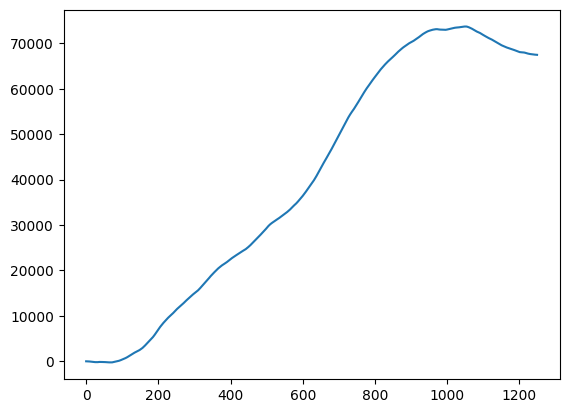

In [45]:
plt.plot(time_series)

##Step 2: Check whether if it has a unit root.

In [46]:
####Adfuller test
from statsmodels.tsa.stattools import adfuller

result = adfuller(time_series)

print("ADF Test Statistic:", result[0])
print("p-value:", result[1])

# Interpretation
if result[1] <= 0.05:
    print("\nConclusion: Reject the null hypothesis (H0). The time series is stationary.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H0). The time series is not stationary.")


ADF Test Statistic: -2.5928104643506433
p-value: 0.0944923213307779

Conclusion: Fail to reject the null hypothesis (H0). The time series is not stationary.


##Step3: if it has a unit root, take as many differences as it is needed.

In [47]:
### Use .diff() as many time as you need
### Do adfuller
differenced_series = time_series.diff().dropna()

first_differenced = time_series.diff().dropna()

from statsmodels.tsa.stattools import adfuller
result_first = adfuller(first_differenced)
print("ADF on First Differenced Series:")
print(f"p-value: {result_first[1]}")
if result_first[1] > 0.05:
    print("First differencing did not make the series stationary.\n")
else:
    print("Series is stationary after first differencing.\n")


ADF on First Differenced Series:
p-value: 0.6525162072584403
First differencing did not make the series stationary.



In [48]:
# Perform second differencing only if the first differenced series is not stationary
if result_first[1] > 0.05:
    second_differenced = first_differenced.diff().dropna()
    result_second = adfuller(second_differenced)
    print(f"p-value: {result_second[1]}")
    if result_second[1] > 0.05:
        print("Second differencing did not make the series stationary.\n")
    else:
        print("Series is stationary after second differencing.\n")
else:
    second_differenced = None



p-value: 1.512757828384733e-25
Series is stationary after second differencing.



##Step 4: Save the differenced series, as differenced_series.

In [49]:
differenced_series = second_differenced

## Step 5: [Here](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.arma_order_select_ic.html#statsmodels.tsa.stattools.arma_order_select_ic), determine the orders p and q of an ARMA(p,q) process. Read the webpage carefully. Use this function to determine the orders p and q to fit the right ARMA model to the **differenced data**. Here do not use the original time series, use the differenced_series that you should have obtained in Step 4.

In [50]:
#### set your y = differenced_series in statsmodels.tsa.stattools.arma_order_select_ic
from statsmodels.tsa.stattools import arma_order_select_ic

order_selection = arma_order_select_ic(differenced_series, ic='aic', max_ar=5, max_ma=5)
p, q = order_selection.aic_min_order
print(f"Selected order (p, q): ({p}, {q})")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Conver

Selected order (p, q): (2, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##Step 6: Now, fit ARIMA(p, d, q) model to your original time series that you downloaded in Step 0, with the parameters p and q that you should have found in Step 5, and the order of differencing d that you should have determined in Step 3.

In [51]:
from statsmodels.tsa.arima.model import ARIMA

d = 2

model = ARIMA(time_series, order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                 1250
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1801.186
Date:                Tue, 12 Nov 2024   AIC                           3612.373
Time:                        15:24:47   BIC                           3638.019
Sample:                             0   HQIC                          3622.015
                               - 1250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8125      0.066     12.347      0.000       0.684       0.941
ar.L2         -0.3059      0.054     -5.696      0.000      -0.411      -0.201
ma.L1          0.5780      0.065      8.853      0.0

## Step 7: Visualize the residuals, and do Ljhung-Box test to see if the residuals are seriously correlated. Do not forget to set, model_df = p+q (in Step 5).

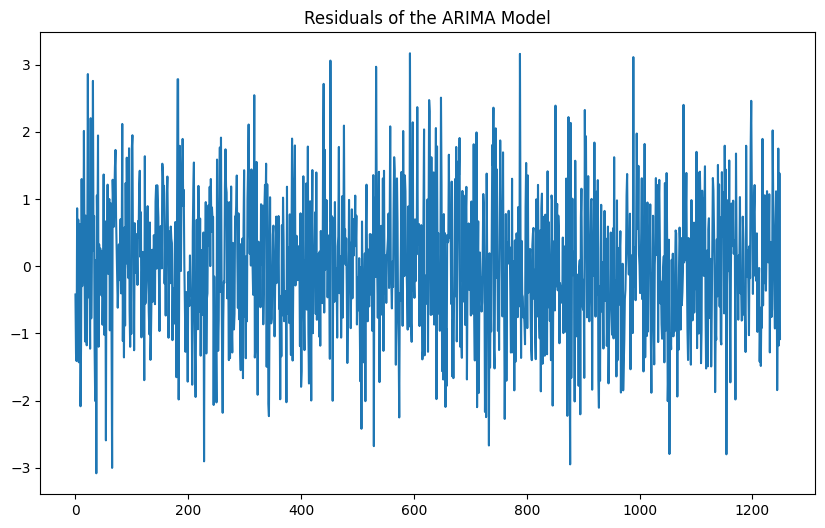

In [52]:
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals of the ARIMA Model")
plt.show()

##Step 8: If you come so far, lean now back, grab a coffee and congrats yourself! (and download and upload this file to LMS system)
